# **Parameter Optimization for Multiclass Dataset**
### Yatharth Gautam
### 102103550
### 3CO20

In [ ]:
!pip install ucimlrepo
!pip install bayesian-optimization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
from bayes_opt import BayesianOptimization

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
dry_bean = fetch_ucirepo(id=602)

# data (as pandas dataframes)
X = dry_bean.data.features
y = dry_bean.data.targets

# metadata
print(dry_bean.metadata)

# variable information
print(dry_bean.variables)


{'uci_id': 602, 'name': 'Dry Bean', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and Electronic

In [ ]:
print("First few rows of features (X):")
print(X.head())

First few rows of features (X):
    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913

In [ ]:
print("\nFirst few rows of targets (y):")
print(y.head())


First few rows of targets (y):
   Class
0  SEKER
1  SEKER
2  SEKER
3  SEKER
4  SEKER


In [ ]:
print(y)

          Class
0         SEKER
1         SEKER
2         SEKER
3         SEKER
4         SEKER
...         ...
13606  DERMASON
13607  DERMASON
13608  DERMASON
13609  DERMASON
13610  DERMASON

[13611 rows x 1 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().ravel(), test_size=0.3, random_state=42)

In [ ]:
# kernels = ['linear', 'poly', 'sigmoid', 'rbf', 'anovadot']
kernels=['rbf', 'poly', 'linear']
pbounds = {'kernel': (0, len(kernels)-1),
           'nu': (0.01, 0.1),
           'tol': (1e-6, 1.0)}

In [ ]:
def evaluate_svm(kernel, nu, tol):
  kernel_name = kernels[int(kernel)]
  model = NuSVC(kernel=kernel_name, nu=nu, tol=tol)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

In [ ]:
# results = []
# optimizers = []
# for sample in range(1):
#   optimizer = BayesianOptimization(evaluate_svm, pbounds)
#   optimizer.maximize(init_points=5, n_iter=20)
#   best_params = optimizer.max['params']
#   best_accuracy = optimizer.max['target']
#   results.append((sample, best_accuracy, best_params))
#   optimizers.append(optimizer)

results = []
optimizers = []
targets = []  # Store target values (accuracy scores)
iteration_counts = []  # Store iteration counts

for sample in range(10):
    optimizer = BayesianOptimization(evaluate_svm, pbounds)
    optimizer.maximize(init_points=5, n_iter=100)
    best_params = optimizer.max['params']
    best_accuracy = optimizer.max['target']
    results.append((sample, best_accuracy, best_params))
    optimizers.append(optimizer)

    # Store target values and iteration counts
    targets.append(optimizer._space.target)
    iteration_counts.append(optimizer._space.params.shape[0])

|   iter    |  target   |  kernel   |    nu     |    tol    |
-------------------------------------------------------------
| 1         | 0.5482    | 1.069     | 0.06738   | 0.4191    |
| 2         | 0.6207    | 1.761     | 0.08889   | 0.8864    |
| 3         | 0.5764    | 1.826     | 0.0739    | 0.4381    |
| 4         | 0.5002    | 0.4125    | 0.08751   | 0.05291   |
| 5         | 0.5235    | 1.713     | 0.07568   | 0.167     |
| 6         | 0.5776    | 0.2886    | 0.06554   | 0.6371    |
| 7         | 0.4819    | 1.132     | 0.02082   | 0.9159    |
| 8         | 0.5766    | 1.625     | 0.06598   | 0.01192   |
| 9         | 0.3519    | 1.881     | 0.02733   | 0.1766    |
| 10        | 0.6153    | 1.779     | 0.05989   | 0.8378    |
| 11        | 0.572     | 1.638     | 0.1       | 0.8109    |
| 12        | 0.5717    | 1.914     | 0.1       | 0.9208    |
| 13        | 0.4167    | 0.3009    | 0.06097   | 0.6367    |
| 14        | 0.4709    | 0.5829    | 0.02123   | 0.5401    |
| 15    

In [ ]:
table = pd.DataFrame(results, columns=['Sample', 'Best Accuracy', 'Best SVM Parameter'])
print(table)

   Sample  Best Accuracy                                 Best SVM Parameter
0       0       0.636876  {'kernel': 1.2436509151700001, 'nu': 0.0260256...
1       1       0.731881  {'kernel': 1.8927648974802818, 'nu': 0.0619645...
2       2       0.677277  {'kernel': 1.5737877227305737, 'nu': 0.0389381...
3       3       0.656464  {'kernel': 1.3078699717181919, 'nu': 0.0998657...
4       4       0.708864  {'kernel': 1.9234026656452772, 'nu': 0.0908302...
5       5       0.690500  {'kernel': 1.3180351074961236, 'nu': 0.0831775...
6       6       0.688051  {'kernel': 1.5170761502180083, 'nu': 0.0961884...
7       7       0.703722  {'kernel': 1.6518146254007573, 'nu': 0.0337885...
8       8       0.719148  {'kernel': 1.1193975469567512, 'nu': 0.0749454...
9       9       0.650343  {'kernel': 1.4573325092630283, 'nu': 0.0305160...


In [ ]:
max_accuracy_sample = table.loc[table['Best Accuracy'].idxmax()]
print(f"Sample with maximum accuracy: {max_accuracy_sample['Sample']}")

Sample with maximum accuracy: 1


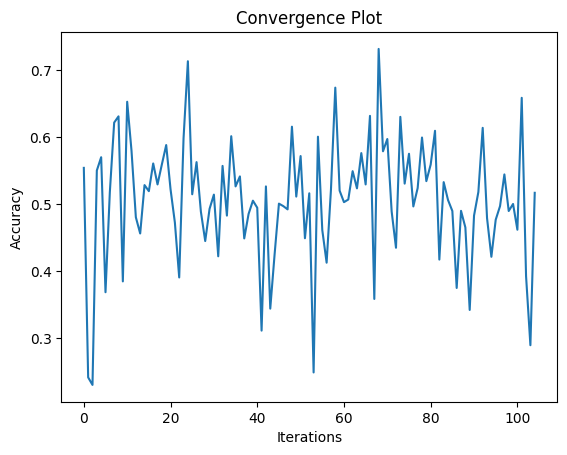

In [ ]:
max_accuracy_optimizer_idx = max_accuracy_sample['Sample']
iterations = range(iteration_counts[max_accuracy_optimizer_idx])
plt.plot(iterations, targets[max_accuracy_optimizer_idx][:iteration_counts[max_accuracy_optimizer_idx]])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Plot')
plt.show()